  Sample Tissue  Type       DR1        5P       MID        3P       ALU  \
0    NaN    NaN   NaN       NaN       NaN       NaN       NaN       NaN   
1  18248  blood  CTRL  0.559828  0.656634  0.703551   0.59292  0.559637   
2  18304  blood  CTRL  0.584125  0.674996   0.69992   0.55917  0.577169   
3  18488  blood  CTRL  0.640974  0.731978  0.708021  0.602748  0.576509   
4  18521  blood  CTRL   0.60848  0.727214  0.707802  0.551197  0.566276   

       LINE       TAR     RS447       4qA  4qA 1-14 4qA 15-56  
0       NaN       NaN       NaN       NaN       NaN       NaN  
1  0.747368  0.422131  0.843735  0.204804  0.356737  0.150232  
2  0.741759  0.386503  0.830962   0.34524  0.347355  0.277178  
3  0.761978  0.638462  0.846975  0.293219  0.441864  0.226749  
4  0.750467  0.477366  0.855659  0.407808  0.399195  0.326263  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     -------

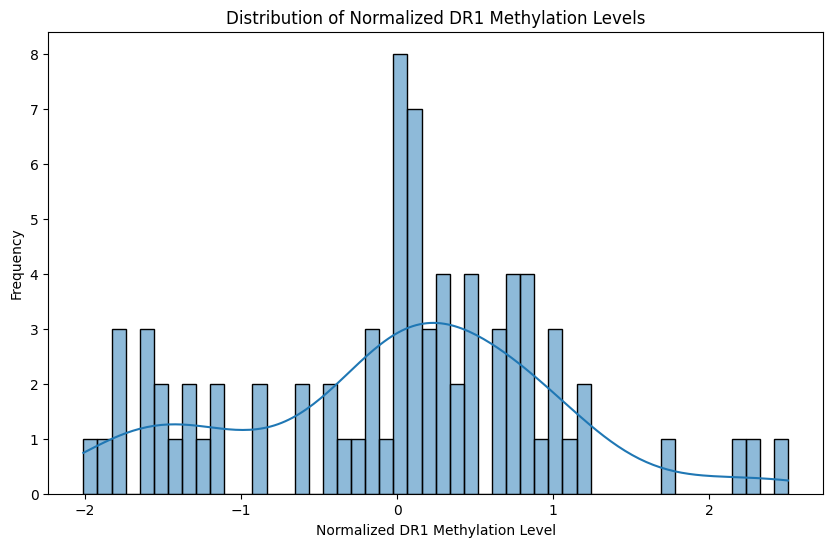

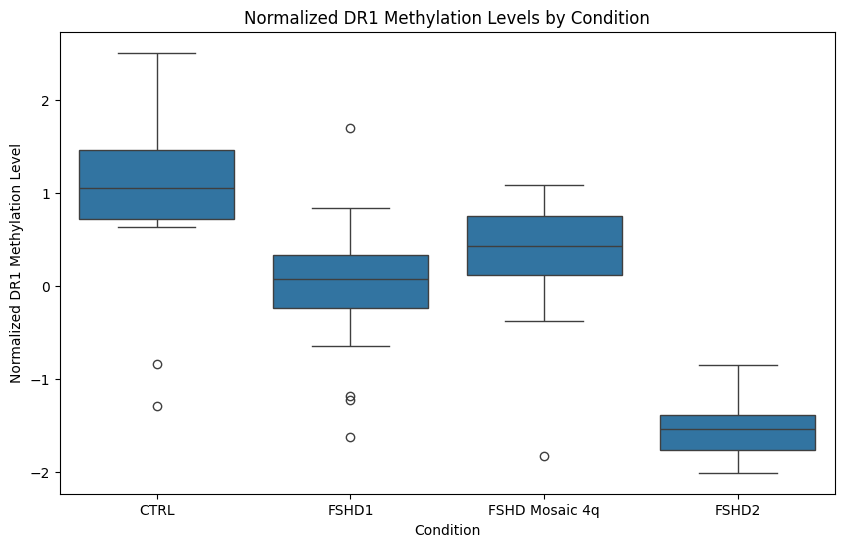

In [23]:
import pandas as pd

# Load the Excel file
file_path = '/Users/katherine/Desktop/nxg_2019_10_17_magdinier_1_sdc2.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Fill missing values only in numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Ensure methylation columns are numeric
methylation_columns = ['DR1', '5P', 'MID', '3P', 'ALU', 'LINE', 'TAR', 'RS447', '4qA', '4qA 1-14', '4qA 15-56']
for col in methylation_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Recheck for missing values after conversion
missing_values = df.isnull().sum()
print("Missing values per column after conversion:\n", missing_values)

# Fill any new missing values resulting from conversion
df[methylation_columns] = df[methylation_columns].fillna(df[methylation_columns].mean())

# Normalize methylation levels if needed
for col in methylation_columns:
    df[f'normalized_{col}'] = (df[col] - df[col].mean()) / df[col].std()

# Display the first few rows of the normalized DataFrame
print(df.head())

# Example: Plot distribution of a specific methylation level
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['normalized_DR1'], bins=50, kde=True)
plt.title('Distribution of Normalized DR1 Methylation Levels')
plt.xlabel('Normalized DR1 Methylation Level')
plt.ylabel('Frequency')
plt.show()

# Plot distribution by condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='normalized_DR1', data=df)
plt.title('Normalized DR1 Methylation Levels by Condition')
plt.xlabel('Condition')
plt.ylabel('Normalized DR1 Methylation Level')
plt.show()


In [24]:
# Save the preprocessed DataFrame to a CSV file
preprocessed_file_path = '/Users/katherine/Desktop/preprocessed_methylation_data.csv'
df.to_csv(preprocessed_file_path, index=False)
